In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [2]:
X,y=make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=10)

In [3]:
import matplotlib.pyplot as plt

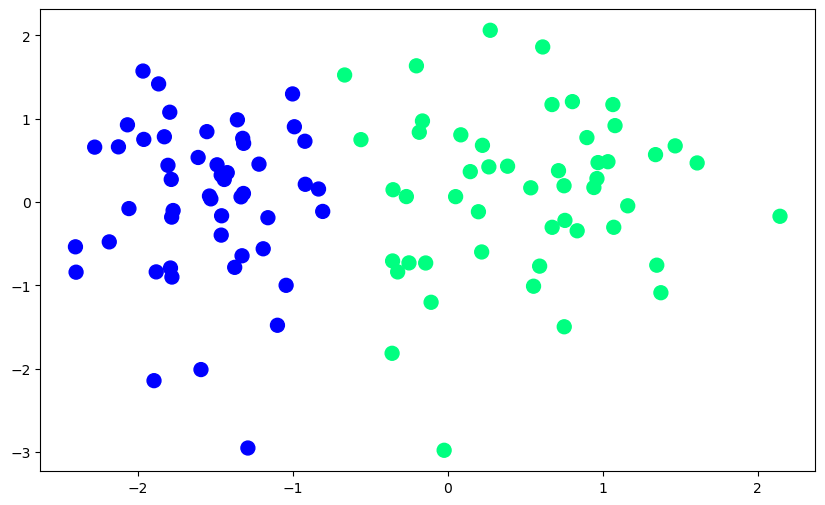

In [6]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

### From above Graph you can see that , there are 2 classes present for data

In [7]:
def Perceptron(X,y):
    X=np.insert(X,0,1,axis=1)
    #Inserting 1 (W0) for equation
    weights=np.ones(X.shape[1])
    lr=0.1 #Definig Learning Rate for Perceptron
    
    for i in range(1000):
        #Running loop for Eochs(1000 times)
        j=np.random.randint(0,100)
        #Randomly Selecting the data point from given data
        y_hat=step(np.dot(X[j],weights))
        #Applying Formula
        weights=weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]

In [8]:
#Creating Step Function for final Results
def step(z):
    return 1 if z>0 else 0

In [12]:
intercept_,coef_=Perceptron(X,y)

In [13]:
print(coef_)
print(intercept_)

[1.38452938 0.11477557]
0.9


#### Formula for calculating coef_and intercept_

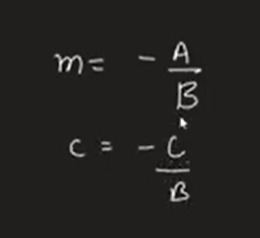

In [14]:
m=-(coef_[0]/coef_[1])
b=-(intercept_/coef_[1])

In [15]:
x_input=np.linspace(-3,3,100)
y_input=m*x_input+b

(-3.0, 2.0)

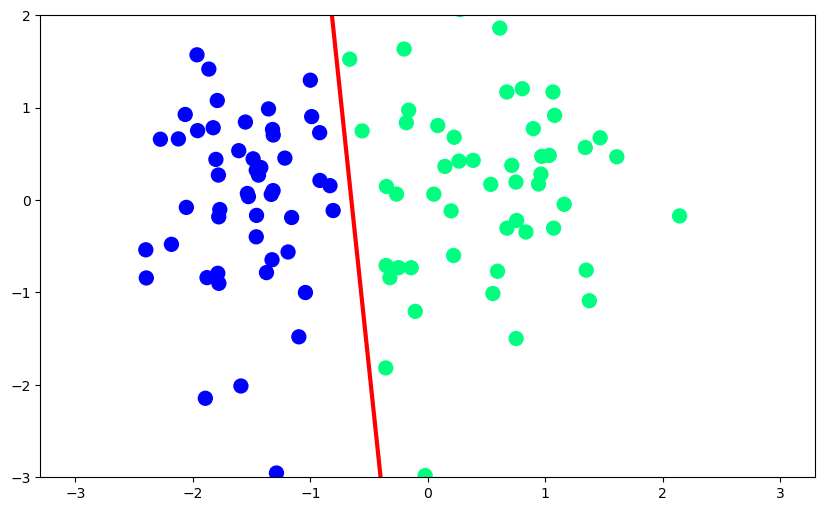

In [16]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

## From above graph you can see that ,we obtained a line using Perceptron which separates and Classify Data accordingly<br> For Observing the Difference between both lines you can tune the class_sep parameter of make regression .

In [17]:
def perceptron(X,y):
    
    m = []
    b = []
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b

In [18]:
m,b=perceptron(X,y)

In [19]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

<IPython.core.display.Javascript object>


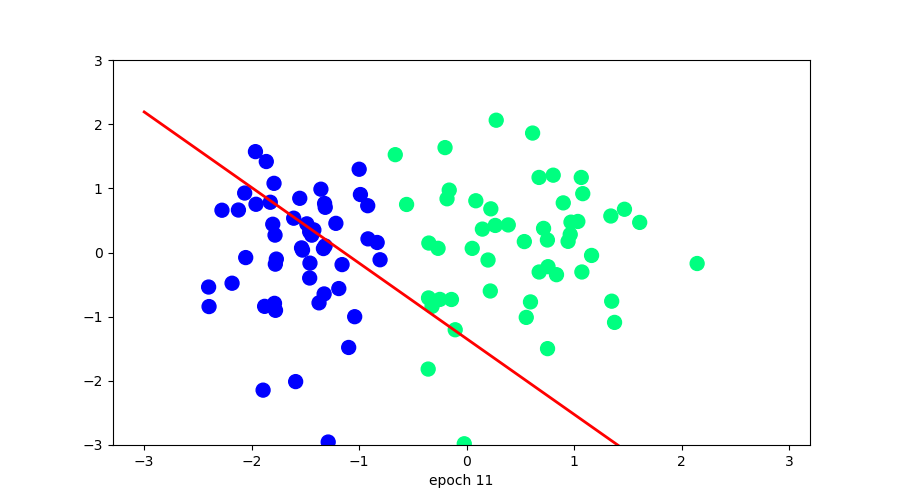

In [21]:
fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)

### From the above animation you can see that, red line moves as the number of epochs increases and for some of the Epochs line will not move which means for that epochs all the data points selected are at the right position of the line , and line will move for epochs where data points doesn't satisfy the Given Condition, And finaly line will attain the given required position for Separation

# <hr>

## Now let us see implementation using Sklearn's logistic regression , however it uses advanced technique than perceptron and attain high accuarcy

In [22]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X,y)

LogisticRegression()

In [23]:
m=-(lr.coef_[0][0]/lr.coef_[0][1])
b=-(lr.intercept_/lr.coef_[0][1])

In [24]:
x_input1=np.linspace(-3,3,100)
y_input1=m*x_input +b

<IPython.core.display.Javascript object>


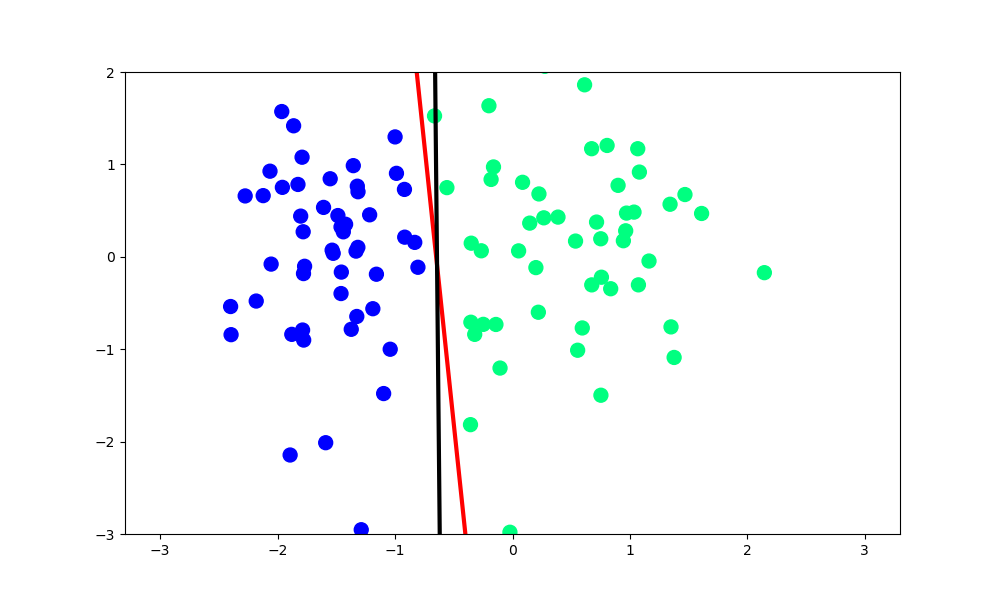

(-3.0, 2.0)

In [28]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

### Red line is For Perceptron Logistic Regression <br> Black Line is for Sklearn's Logistic Regression

### You can see that , by just visualizing both algorithm we can conclude that , Sklearn's Logistic regression is more accurate than Perceptron Logistic algorithm

### 1.Perceptron algo will stop immidiately after classifying all points while in Logistic regression it will classify the data evenly (it will improve itself for future)

### 2.Logistic Regression Line will cut data Symmetrically for both side(i.e Equal margin on both side) , whereas Perceptron will do not put any efforts in further improvement it will stop immediatly after cutting (classifying) the data.

### The Main problem associated with perceptron Trick is that , we will not get best line for data .<br> Even if we achieve a minimum error on trainig data in Perceptron trick but we will never get the same result or minimum result on Testing data , it may increase the testing result.

# Conclude